## Байєсівський підхід класифікації (Naive Bayes). 

Посилання на оригінал тут   [тут](https://www.analyticsvidhya.com/blog/2021/11/implementation-of-gaussian-naive-bayes-in-python-sklearn/), див. також 
[тут](https://machinelearningmastery.com/naive-bayes-classifier-scratch-python/)

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import  math
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

Завантажимо дані по дослідженням пацієнтів, які мають підозру на ракове захворення. 

In [2]:
dataset = pd.read_csv("data.csv")
dataset.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Видалимо колонки id та Unnamed (перша та остання колонки), тому що вони не підходять для аналізу. 

In [4]:
dataset = dataset.drop(["id"], axis = 1)
dataset = dataset.drop(["Unnamed: 32"], axis = 1)

Візуалізуємо дані. Тут Malignant та  Bening - відповідно, злоякісні і доброякісні пухлини. 

In [5]:
M = dataset[dataset.diagnosis == "M"]
B = dataset[dataset.diagnosis == "B"]

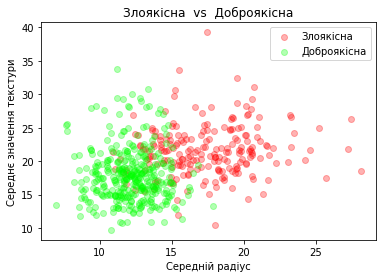

In [6]:
plt.title("Злоякісна  vs  Доброякісна")
plt.xlabel("Середній радіус")
plt.ylabel("Середнє значення текстури")
plt.scatter(M.radius_mean, M.texture_mean, color = "red", label = "Злоякісна", alpha = 0.3)
plt.scatter(B.radius_mean, B.texture_mean, color = "lime", label = "Доброякісна", alpha = 0.3)
plt.legend()
plt.show()

Як ми бачимо на картинці, дані можна розділити на дві групи. Тепер зробимо класифікацію. Спочатку поділимо на групи.

In [7]:
dataset.diagnosis


0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

Замінимо тепер М і В на 1 і 0, відповідно. 

In [8]:
dataset.diagnosis = [1 if i == "M" else 0 for i in dataset.diagnosis]
dataset.diagnosis

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

Тепер розділимо дані на змінні і результат. Змінні у нас тепер змінні $x$- це всі дані dataset, крім diagnosis, а diagnosis- це наш результат, тобто $y$. 

In [9]:
x = dataset.drop(["diagnosis"], axis = 1)
y = dataset.diagnosis.values

Перш ніж проводити аналів, стандартизуємо дані. 

In [10]:
x = (x-np.min(x))/(np.max(x) - np.min(x))
x

C:\Users\vica\anaconda3\envs\EnvironmentVica\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\vica\anaconda3\envs\EnvironmentVica\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,0.132056,...,0.623266,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.105667
565,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,0.113100,...,0.560655,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.074315
566,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,0.137321,...,0.393099,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909
567,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,0.675253,0.425442,...,0.633582,0.730277,0.668310,0.402035,0.619626,0.815758,0.749760,0.910653,0.497142,0.452315


Розіб'ємо тепер дані на 2 множини- навчальний набір та тестовий набір. Використаємо пакет sklearn.  

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

Тепер ми завантажимо модуль Gaussian Naive Bayes з  SKlearn GaussianNB. Далі ми визначимо класифікатор, та застосуємо його до множин x_train та  y_train. 

In [12]:
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

Перевіримо, наскільки вірно зроблена коасифікація. 

In [13]:
y_pred  =  classifier.predict(x_test)

In [14]:
Y = np.matrix([y_pred,y_test]).T
print(Y)

[[1 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]

Завантажимо тепер confusion_matrix та accuracy_score. confusion_matrix (матриця невідповідностей) дає інформацію про те, скільки елементів класифіковане неправильно. Точність прогнозу у цьому випадку дорівнює $(102+58)/171 \sim 0.94$. 

In [15]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)
print(cm)
print(ac)

[[102   6]
 [  5  58]]
0.935672514619883


Всього тут 171 даних.

Зробимо тепер цю процедуру вручну. 
Візьмемо 70% даних, обчислимо середні та коваріаційну матриці окремо в групах, в яких пухлини злоякісні і доброякісні

In [16]:
data = np.array(dataset, dtype = float)
data_train = data[0:398,:]
data_test = data[398:,:]

Виділяємо групи по тому, якого рода пухлина, в тренувальній та тестовий групах. 

In [17]:
M1 = data_train[data_train[:,0]== 1]
M_train = M1[:,1:]
B1 = data_train[data_train[:,0] == 0]
B_train = B1[:,1:]

M2 = data_test[data_test[:,0]== 1]
M_test = M2[:,1:]
B2 = data_test[data_test[:,0] == 0]
B_test = B2[:,1:]
len(B_test)+len(M_test)

171

Визначимо тепер щільність  багатовимірного нормального розподілу з середнім $m$ та коваріацією $S$. 

In [18]:
def ln_f(z,m,S):
    return - 0.5* np.log(np.linalg.det(S))- np.dot((z-m).T, np.dot(np.linalg.inv(S),z-m))

Тепер визначимо в тренувальній групі середнє та коваріацію. 

In [19]:
M_train_mean = np.mean(M_train, axis = 0)
M_train_cov = np.cov(M_train, rowvar = False)
B_train_mean = np.mean(B_train, axis = 0)
B_train_cov = np.cov(B_train, rowvar = False)

А тепер проведемо класифікацію на тестовій групі. Ми класифікуємо спостереження до 1ї групи, якщо 
$$
f(y|G_1)> f(y|G_2), 
$$
і до другої, якщо виконана протилежна нерівніть. Зараз ми будемо вважати, що кожен випадок з рівною ймовірністю може належати або до групи доброякісних, або до групи злоякісних пухлин.  Спочатку подивимось, скільки злоякісних пухлин ми класифікувати правильно: 

In [20]:
count = []
k = 0
for i in range(len(M_test)): 
    z = M_test[i,:]
    if ln_f(z,M_train_mean,M_train_cov) > ln_f(z,B_train_mean,B_train_cov): 
        count.append(1)
        k+=1
    else: 
        count.append(0)
#print(count)
print(k,len(count)-k)

39 0


Отже, всі злоякісні пухлини класифіковані вірно. Зробимо те саме з доброякісними: 

In [21]:
count = []
m = 0
for i in range(len(B_test)): 
    z = B_test[i,:]
    if ln_f(z,B_train_mean,B_train_cov) > ln_f(z,M_train_mean,M_train_cov): 
        count.append(1)
        m+=1
    else: 
        count.append(0)
#print(count)
print(len(count)-m,m)

23 109


Тут ситуація гірша, ми непроавильно класифікували 23 випадки. Порахуємо тепер відсоток вдало класифікованих випадків: 

In [22]:
def p(a,b):
    return (a+b)/(len(B_test)+ len(M_test))
   
print(p(k,m))

0.8654970760233918


Отже, приблизно $87\% $ класифіковано правильно. Результат відрізняється від того,що ми отримали, використовуючи бібліотеку sklearn, оскільки там розбиття на підгрупи було випадкове, і процедура використовує більш вишуканий алгоритм (див. довументацію [тут](http://i.stanford.edu/pub/cstr/reports/cs/tr/79/773/CS-TR-79-773.pdf
), але результат має такий самий порядок. 

Врахуємо тепер обсяги доброякісних і злоякісних пухлин в тренувальній вибірці  вибірці. Маємо  39 злоякісних, та 23+109 = 132  доброякісні,  в сумі 171 випадок. Виходячи з цього, покладемо $p1= 62/171$ ймовірність того, що пухлина злоякісна, та $p2= 1-62/171$ ймовірність того, що пухлина доброякісна. 

In [59]:
p1 = 20/171
p2 = 1- 20/171

Використаємо тепер попередній алгоритм, але враховуючи ці ймовірності. 
Ми класифікуємо спостереження до 1ї групи, якщо 
$$
p_1 f(y|G_1)>  p_2 f(y|G_2), 
$$
і до другої, якщо виконана протилежна нерівніть.

Отримаємо: 

In [60]:
count = []
k = 0
for i in range(len(M_test)): 
    z = M_test[i,:]
    if np.log(p1)+ ln_f(z,M_train_mean,M_train_cov) > np.log(p2) + ln_f(z,B_train_mean,B_train_cov): 
        count.append(1)
        k+=1
    else: 
        count.append(0)
#print(count)
print(k,len(count)-k)

39 0


In [61]:
count = []
m = 0
for i in range(len(B_test)): 
    z = B_test[i,:]
    if np.log(p2)+ ln_f(z,B_train_mean,B_train_cov) > np.log(p1) + ln_f(z,M_train_mean,M_train_cov): 
        count.append(1)
        m+=1
    else: 
        count.append(0)
#print(count)
print(len(count)-m,m)

17 115


In [62]:
print(p(k,m))

0.9005847953216374


Отже, ймовірність правильної класифікації у цьому випадку більше, як і очікувалось. 

Будуємо ядерні оцінкі щільності на відрізку $(\min(train), \max(train)$, а саме, на  $[10,40]$. 

In [64]:
M12_train = M1[:,2]
B12_train = B1[:,2]

M12_test = M2[:,2]
B12_test = B2[:,2]

In [65]:
print(np.min(M12_train), np.max(M12_train))

10.38 39.28


In [66]:
N = 20
h = 0.1
x1 = np.linspace(10, 40, N, endpoint=True)

Будуємо оцінку щільності
$$
\hat{f} (y_0)= \frac{1}{nh} \sum_{i=1}^n K \left(\frac{y_0-y_i}{h}\right),
$$
де 
$$
K(x) = \frac{1}{2\pi } e^{-|x|^2/2}. 
$$

In [67]:
def K(w): 
    return  (2*math.pi)**(-1/2) * (np.exp(-0.5* w**2))

In [68]:
def f(u,v):
    return [sum(((N*h)**(-1/2)) * K((v1-u1)/h) for v1 in v) for u1 in u]

Зробимо тепер класифікацію, використовуючи цю функцію. 

In [69]:
count = []
k = 0
for i in range(39): 
    if f(M12_test,x1)[i] > f(B12_test,x1)[i]: 
        count.append(1)
        k+=1
    else: 
        count.append(0)
#print(count)
print(k,len(count)-k)

17 22


Тобто наша ''ручна підгонка'' щільності розподілу виявилася не дуже вдалою. Зробимо підгонку, використовуючи sklearn.

In [71]:
from sklearn.neighbors import KernelDensity

kde = KernelDensity(bandwidth=1.0, kernel='gaussian')
kde.fit(M12_test[:,None])

KernelDensity()

Функція score_samples  повертає логарифм ймовірнісної щільності. Побудуємо тепер графік щільності, використовуючи точки $x1$. 

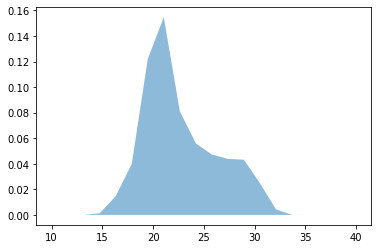

In [72]:
logprob = kde.score_samples(x1[:, None])
plt.fill_between(x1, np.exp(logprob), alpha=0.5)
plt.show()

Не дуже схоже на нормальний, може, більше підходить зсунений хі-квадрат. 

Якщо ми припускаємо, що у нас однакові коваріаційні матриці ( в принципі, це треба перевіряти), можна порахувати $S_{pl}$ та робити класифікацію, використовуючи цю матрицю. Побачимо, як це працює. 

In [34]:
M_new = M.filter(['radius_mean', 'texture_mean'])
M_new = np.array(M_new, dtype = float)
B_new = B.filter(['radius_mean', 'texture_mean'])
B_new = np.array(B_new, dtype = float)

In [35]:
M_mean = np.mean(M_new, axis = 0)
B_mean = np.mean(B_new, axis = 0 )
M_cov = np.cov(M_new, rowvar = False)
B_cov = np.cov(B_new, rowvar = False)
print(B_mean)
print(M_mean)

[12.14652381 17.9147619 ]
[17.46283019 21.60490566]


In [73]:
Spl = ((len(M_new)-1)* M_cov + (len(B_new)-1)* B_cov )/(len(M_new)+ len(B_new)-2)

In [37]:
def L(z,V,p):
    return np.log(p) + np.dot(V.T, np.dot(np.linalg.inv(Spl),z))- 0.5* np.dot(V.T, np.dot(np.linalg.inv(Spl),V))

In [38]:
p1 = 0.5
p2 = 0.5

In [74]:
def f(U,V):
    countU = []
    k = 0
    for i in range(len(U)): 
        z = U[i,:]
        if L(z,B_mean,p1) > L(z,M_mean,p2): 
            countU.append(1)
            k+=1
        else: 
            countU.append(0)
    #print(count)
    print(k,len(countU)-k)
    countV = []
    m = 0
    for i in range(len(V)): 
        w = V[i,:]
        if L(w,M_mean,p1) > L(w,B_mean,p2): 
            countV.append(1)
            m+=1
        else: 
            countV.append(0)
    p = (m+ k)/(len(countV)+len(countU))
    print(len(countV)-m,m)
    print(p)

In [40]:
f(B_new,M_new)

336 21
39 173
0.8945518453427065


## Метод  $k$ найближчих сусідів (KNN). 

Застосуємо тепер до того ж датасету   метод $k$  найближчих сусідів. Ми фіксуємо $k$, і обираємо метрику, в  якій рахуємо відстань.  

In [41]:
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

Ми обрали  $k=5$ сусідів та  метрику Мінковського
    $$
    d_p(x,y)= \left(\sum_{i=1}^n (x_i-y_i)^p \right)^{1/p} 
    $$
    з $p=2$. 

In [42]:
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)
print(cm)
print(ac)

[[107   1]
 [  6  57]]
0.9590643274853801


Розглянемо ще один приклад (див. посилання [тут](https://www.analyticsvidhya.com/blog/2021/01/a-quick-introduction-to-k-nearest-neighbor-knn-classification-using-python/)). Зчитаємо наступну таблицю соціологічних даних. 

In [43]:
dataset = pd.read_csv('Social_Network_Ads.csv')
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [44]:
X = dataset.iloc[:, [1, 2, 3]].values
y = dataset.iloc[:, -1].values

Трансформуємо перший стовбчик $X$ в 1 та 0 за допомогою LabelEncoder (у попередньому прикладі ми зробили це "вручну"). 

In [45]:
le = LabelEncoder()
X[:,0] = le.fit_transform(X[:,0])
X

array([[1, 19, 19000],
       [1, 35, 20000],
       [0, 26, 43000],
       ...,
       [0, 50, 20000],
       [1, 36, 33000],
       [0, 49, 36000]], dtype=object)

Тепер розіб'ємо вибірку в співвідношенні 20:80. 

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

Шкалюємо дані (для того, щоб привести всю вибірку до одного стандарту). 

In [47]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Тепер ми можемо застосувати метод $k$ найближчих сусідів. 

In [48]:
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

Наведемо матрицю невідповідностей та точність класифікації:

In [49]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)
print(cm)
print(ac)

[[55  3]
 [ 1 21]]
0.95
